In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\souma\OneDrive\Documents\NIFTY FIFTY STOCK(2000-2021)\ADANIPORTS.csv")

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
data1=data.reset_index()['Close']

In [5]:
data1

0       962.90
1       893.90
2       884.20
3       921.55
4       969.30
         ...  
3317    730.75
3318    749.15
3319    746.25
3320    746.75
3321    730.05
Name: Close, Length: 3322, dtype: float64

In [6]:
data1.shape

(3322,)

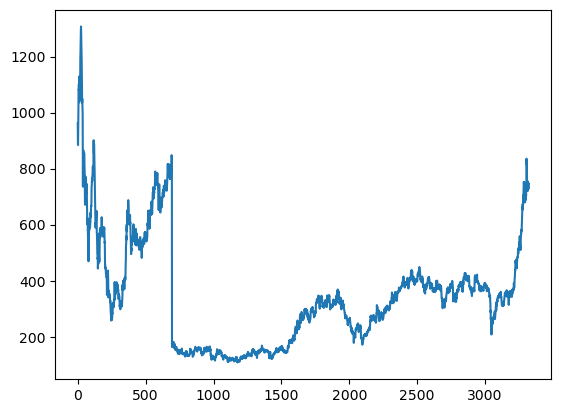

In [7]:
plt.plot(data1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [9]:
data1

array([[0.71274334],
       [0.65521697],
       [0.64712993],
       ...,
       [0.53211889],
       [0.53253575],
       [0.5186127 ]])

In [10]:
training_size=int(len(data1)*0.70)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [11]:
training_size, test_size

(2325, 997)

In [12]:
train_data

array([[0.71274334],
       [0.65521697],
       [0.64712993],
       ...,
       [0.17620576],
       [0.18158323],
       [0.18708575]])

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step=300
X_train,y_train=create_dataset(train_data, time_step)
X_test,y_test=create_dataset(test_data, time_step)

In [15]:
print(X_train)

[[0.71274334 0.65521697 0.64712993 ... 0.21626579 0.21701613 0.20888741]
 [0.65521697 0.64712993 0.67826921 ... 0.21701613 0.20888741 0.19838259]
 [0.64712993 0.67826921 0.71807912 ... 0.20888741 0.19838259 0.18854475]
 ...
 [0.08949935 0.08574763 0.08691484 ... 0.18825295 0.18308391 0.17712285]
 [0.08574763 0.08691484 0.09429322 ... 0.18308391 0.17712285 0.17674768]
 [0.08691484 0.09429322 0.08774855 ... 0.17712285 0.17674768 0.17620576]]


In [16]:
print(X_train.shape),print(y_train.shape)

(2024, 300)
(2024,)


(None, None)

In [17]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(300, 1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 300, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 300, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

32/32 [==============================] - 25s 530ms/step - loss: 0.0086 - val_loss: 7.0307e-04
Epoch 2/100
32/32 [==============================] - 16s 496ms/step - loss: 0.0017 - val_loss: 5.4781e-04
Epoch 3/100
32/32 [==============================] - 15s 477ms/step - loss: 0.0013 - val_loss: 4.6385e-04
Epoch 4/100
32/32 [==============================] - 14s 445ms/step - loss: 0.0014 - val_loss: 4.7484e-04
Epoch 5/100
32/32 [==============================] - 14s 437ms/step - loss: 0.0013 - val_loss: 5.0242e-04
Epoch 6/100
32/32 [==============================] - 14s 452ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/100
32/32 [==============================] - 14s 439ms/step - loss: 0.0012 - val_loss: 3.9002e-04
Epoch 8/100
32/32 [==============================] - 17s 538ms/step - loss: 0.0010 - val_loss: 8.5146e-04
Epoch 9/100
32/32 [==============================] - 20s 623ms/step - loss: 8.6551e-04 - val_loss: 3.6215e-04
Epoch 10/100
32/32 [=========================

32/32 [==============================] - 14s 446ms/step - loss: 2.1832e-04 - val_loss: 9.9914e-05
Epoch 74/100
32/32 [==============================] - 18s 554ms/step - loss: 2.4455e-04 - val_loss: 3.4405e-04
Epoch 75/100
32/32 [==============================] - 1338s 43s/step - loss: 2.7039e-04 - val_loss: 1.5235e-04
Epoch 76/100
32/32 [==============================] - 16s 485ms/step - loss: 2.4885e-04 - val_loss: 9.4533e-05
Epoch 77/100
32/32 [==============================] - 15s 455ms/step - loss: 2.3458e-04 - val_loss: 1.2061e-04
Epoch 78/100
32/32 [==============================] - 19s 612ms/step - loss: 2.2400e-04 - val_loss: 9.4518e-05
Epoch 79/100
32/32 [==============================] - 21s 652ms/step - loss: 2.1922e-04 - val_loss: 9.1345e-05
Epoch 80/100
32/32 [==============================] - 20s 619ms/step - loss: 2.2748e-04 - val_loss: 9.5597e-05
Epoch 81/100
32/32 [==============================] - 20s 631ms/step - loss: 2.3185e-04 - val_loss: 1.9880e-04
Epoch 82/100
3

In [22]:
train_predict=model.predict(X_train)

64/64 [==============================] - 9s 106ms/step


In [23]:
test_predict=model.predict(X_test)

22/22 [==============================] - 2s 105ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

322.51150523871723

In [26]:
math.sqrt(mean_squared_error(y_test,test_predict))

394.6874170449068

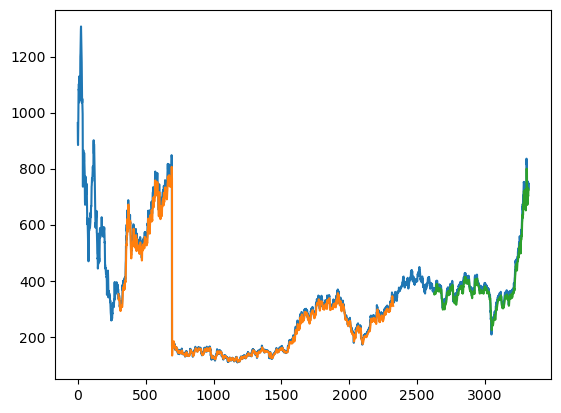

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=300
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

997

In [37]:
x_input=test_data[897:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.27329192546583847,
 0.28821543207303346,
 0.30305556713493687,
 0.29626078619367213,
 0.2967193296927758,
 0.3026387094084789,
 0.29872024677977405,
 0.29930384759681516,
 0.30659885780982954,
 0.30643211471924636,
 0.29992913418650213,
 0.2962191004210263,
 0.28033682104297797,
 0.30067947809412643,
 0.3024302805452499,
 0.3089332610779941,
 0.31310183834257366,
 0.3129767810246362,
 0.3146442119304681,
 0.31326858143315683,
 0.3300262620367669,
 0.325899370544833,
 0.32635791404393677,
 0.3241485680937096,
 0.33836341656592606,
 0.34098962024261115,
 0.33377798157488847,
 0.33619575638834465,
 0.357372128892409,
 0.35762224352828387,
 0.3501188044520406,
 0.3397390470632373,
 0.35416232439868267,
 0.3756721830839135,
 0.36654299887448416,
 0.35666347075743043,
 0.34653382800450205,
 0.3425319938305057,
 0.3427404226937346,
 0.33490349743632497,
 0.3624577931551961,
 0.36916920255116925,
 0.3769227562632873,
 0.3838425945224895,
 0.3826337071157614,
 0.3952228104547917,
 0.39513943

In [40]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.49757093]
101
1 day input [0.28821543 0.30305557 0.29626079 0.29671933 0.30263871 0.29872025
 0.29930385 0.30659886 0.30643211 0.29992913 0.2962191  0.28033682
 0.30067948 0.30243028 0.30893326 0.31310184 0.31297678 0.31464421
 0.31326858 0.33002626 0.32589937 0.32635791 0.32414857 0.33836342
 0.34098962 0.33377798 0.33619576 0.35737213 0.35762224 0.3501188
 0.33973905 0.35416232 0.37567218 0.366543   0.35666347 0.34653383
 0.34253199 0.34274042 0.3349035  0.36245779 0.3691692  0.37692276
 0.38384259 0.38263371 0.39522281 0.39513944 0.39088749 0.40339322
 0.42402768 0.43332361 0.4406603  0.45666764 0.46358748 0.45479178
 0.4717162  0.46187836 0.46454625 0.49714452 0.47346701 0.48764017
 0.51065071 0.51844595 0.53728792 0.53436992 0.53391138 0.53587061
 0.53136854 0.51702864 0.50944183 0.50802451 0.48376339 0.47659344
 0.48209596 0.51181792 0.52569928 0.4992705  0.48376339 0.49610238
 0.50235525 0.49556047 0.52378173 0.52878403 0.60656968 0.5892284
 0.59610655 0.59660678 0.53078494 0

9 day output [[0.3853354]]
10 day input [0.29992913 0.2962191  0.28033682 0.30067948 0.30243028 0.30893326
 0.31310184 0.31297678 0.31464421 0.31326858 0.33002626 0.32589937
 0.32635791 0.32414857 0.33836342 0.34098962 0.33377798 0.33619576
 0.35737213 0.35762224 0.3501188  0.33973905 0.35416232 0.37567218
 0.366543   0.35666347 0.34653383 0.34253199 0.34274042 0.3349035
 0.36245779 0.3691692  0.37692276 0.38384259 0.38263371 0.39522281
 0.39513944 0.39088749 0.40339322 0.42402768 0.43332361 0.4406603
 0.45666764 0.46358748 0.45479178 0.4717162  0.46187836 0.46454625
 0.49714452 0.47346701 0.48764017 0.51065071 0.51844595 0.53728792
 0.53436992 0.53391138 0.53587061 0.53136854 0.51702864 0.50944183
 0.50802451 0.48376339 0.47659344 0.48209596 0.51181792 0.52569928
 0.4992705  0.48376339 0.49610238 0.50235525 0.49556047 0.52378173
 0.52878403 0.60656968 0.5892284  0.59610655 0.59660678 0.53078494
 0.51944641 0.53553712 0.53983076 0.51102589 0.51060903 0.52507399
 0.51469423 0.5191963  0

18 day output [[0.26331508]]
19 day input [0.31326858 0.33002626 0.32589937 0.32635791 0.32414857 0.33836342
 0.34098962 0.33377798 0.33619576 0.35737213 0.35762224 0.3501188
 0.33973905 0.35416232 0.37567218 0.366543   0.35666347 0.34653383
 0.34253199 0.34274042 0.3349035  0.36245779 0.3691692  0.37692276
 0.38384259 0.38263371 0.39522281 0.39513944 0.39088749 0.40339322
 0.42402768 0.43332361 0.4406603  0.45666764 0.46358748 0.45479178
 0.4717162  0.46187836 0.46454625 0.49714452 0.47346701 0.48764017
 0.51065071 0.51844595 0.53728792 0.53436992 0.53391138 0.53587061
 0.53136854 0.51702864 0.50944183 0.50802451 0.48376339 0.47659344
 0.48209596 0.51181792 0.52569928 0.4992705  0.48376339 0.49610238
 0.50235525 0.49556047 0.52378173 0.52878403 0.60656968 0.5892284
 0.59610655 0.59660678 0.53078494 0.51944641 0.53553712 0.53983076
 0.51102589 0.51060903 0.52507399 0.51469423 0.5191963  0.53453666
 0.53211889 0.53253575 0.5186127  0.49757093 0.47725919 0.46077013
 0.44941282 0.44128314

27 day output [[0.18842274]]
28 day input [0.35737213 0.35762224 0.3501188  0.33973905 0.35416232 0.37567218
 0.366543   0.35666347 0.34653383 0.34253199 0.34274042 0.3349035
 0.36245779 0.3691692  0.37692276 0.38384259 0.38263371 0.39522281
 0.39513944 0.39088749 0.40339322 0.42402768 0.43332361 0.4406603
 0.45666764 0.46358748 0.45479178 0.4717162  0.46187836 0.46454625
 0.49714452 0.47346701 0.48764017 0.51065071 0.51844595 0.53728792
 0.53436992 0.53391138 0.53587061 0.53136854 0.51702864 0.50944183
 0.50802451 0.48376339 0.47659344 0.48209596 0.51181792 0.52569928
 0.4992705  0.48376339 0.49610238 0.50235525 0.49556047 0.52378173
 0.52878403 0.60656968 0.5892284  0.59610655 0.59660678 0.53078494
 0.51944641 0.53553712 0.53983076 0.51102589 0.51060903 0.52507399
 0.51469423 0.5191963  0.53453666 0.53211889 0.53253575 0.5186127
 0.49757093 0.47725919 0.46077013 0.44941282 0.44128314 0.43373433
 0.42474982 0.41346559 0.40006465 0.38533539 0.37016162 0.35517609
 0.34066799 0.32667586 

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
len(data1)

3322

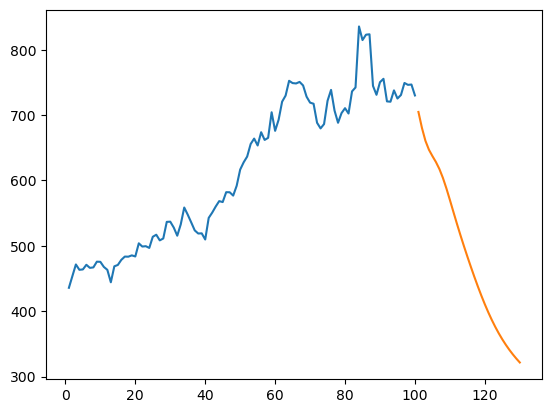

In [45]:
plt.plot(day_new,scaler.inverse_transform(data1[3222:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

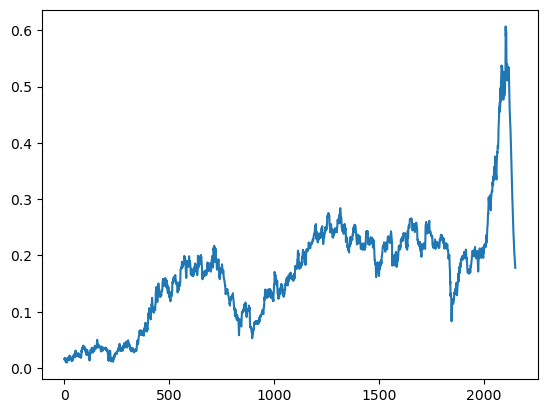

In [46]:
data2=data1.tolist()
data2.extend(lst_output)
plt.plot(data2[1200:])